# Fiyat Tahmin icin Model Gelistirme

## Veri Okuma ve Veri duzenleme

In [28]:
#### Kutuphane ####
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn import model_selection
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler


#### Veri #####
veriseti = pd.read_csv("/Users/sdrttnclskn/Desktop/tez/tez-calismasi/tez_uygulama/temiz_veri_seti.csv")
df = veriseti.copy()
#tanimsız olan boş kolon drop edildi.
df.drop(df.columns[[0]], axis=1, inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187438 entries, 0 to 187437
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TARIH           187438 non-null  object 
 1   FONTIP          187438 non-null  object 
 2   FONTUR          187438 non-null  object 
 3   FON             187438 non-null  object 
 4   FONTOPLAMDEGER  187438 non-null  float64
 5   TEDAVPAYSAYISI  187438 non-null  float64
 6   KISISAYISI      187438 non-null  int64  
 7   FONFIYAT        187438 non-null  float64
 8   FAIZ            187438 non-null  float64
 9   DOLARFIYAT      187438 non-null  float64
 10  ALTINFIYAT      187438 non-null  float64
 11  BB              187438 non-null  float64
 12  DT              187438 non-null  float64
 13  DB              187438 non-null  float64
 14  DÖT             187438 non-null  float64
 15  EUT             187438 non-null  float64
 16  FB              187438 non-null  float64
 17  FKB       

,TARIH,FONTIP,FONTUR,FON,FONTOPLAMDEGER,TEDAVPAYSAYISI,KISISAYISI,FONFIYAT,FAIZ,DOLARFIYAT,...,FB,FKB,GAS,HB,HS,KBA,KKS,KH,KM,OSKS
0,2019-01-02,BORSA YATIRIM FONU,Altın Fonu,FGA,8.722176e+07,4.350000e+06,0,20.050979,0.2302,5.2905,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-01-02,BORSA YATIRIM FONU,Gümüş Fonu,FGS,1.238294e+07,7.000000e+05,0,17.689916,0.2302,5.2905,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-01-02,BORSA YATIRIM FONU,Hisse Senedi Fonu,DJA,1.491130e+07,4.800000e+05,0,31.065216,0.2302,5.2905,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-01-02,EMEKLİLİK FONU,Altın Fonu,AEA,1.465104e+09,6.335717e+10,325392,0.023125,0.2302,5.2905,...,7.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-01-02,EMEKLİLİK FONU,Altın Fonu,AEL,1.784293e+09,7.415738e+10,325460,0.024061,0.2302,5.2905,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Dogrusal Coklu Regresyon

## PLS ile Model Gelistirme
### 1. Model

In [29]:
df_pls = df.copy()
X_p = df_pls.drop(['TARIH','FONTIP','FONTUR','FON','FONFIYAT'], axis = 1)
y_p = df_pls["FONFIYAT"]

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_p, y_p, test_size=0.25, random_state=42)

X_p.head()

,FONTOPLAMDEGER,TEDAVPAYSAYISI,KISISAYISI,FAIZ,DOLARFIYAT,ALTINFIYAT,BB,DT,DB,DÖT,...,FB,FKB,GAS,HB,HS,KBA,KKS,KH,KM,OSKS
0,8.722176e+07,4.350000e+06,0,0.2302,5.2905,219270.871675,100.00,0.00,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.238294e+07,7.000000e+05,0,0.2302,5.2905,219270.871675,100.00,0.00,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.491130e+07,4.800000e+05,0,0.2302,5.2905,219270.871675,99.83,0.17,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.465104e+09,6.335717e+10,325392,0.2302,5.2905,219270.871675,1.01,3.44,85.25,3.07,...,7.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.784293e+09,7.415738e+10,325460,0.2302,5.2905,219270.871675,0.25,99.75,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [31]:
pls_model = PLSRegression().fit(X_train_p, y_train_p)

In [34]:
pls_model

PLSRegression(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06)

In [35]:
pls_model.coef_

array([[ 8.84294439],
       [-4.69831641],
       [-3.03243924],
       [ 0.0337065 ],
       [-0.09314651],
       [-0.02433704],
       [-0.33800515],
       [-0.31991584],
       [-0.81996284],
       [ 0.91092399],
       [-0.09762054],
       [ 1.74953948],
       [ 2.26792273],
       [ 1.19959689],
       [-0.41431445],
       [-1.57986807],
       [-1.26811436],
       [-0.8361369 ],
       [-0.61910158],
       [-0.24914284],
       [-0.09490851]])

### 2. Tahmin

In [13]:
X_train_p.head()

,FONTOPLAMDEGER,TEDAVPAYSAYISI,KISISAYISI,FAIZ,DOLARFIYAT,ALTINFIYAT,BB,DT,DB,DÖT,...,FB,FKB,GAS,HB,HS,KBA,KKS,KH,KM,OSKS
8849,1.657699e+09,1.160783e+11,884267,0.2397,5.3659,220120.171370,74.74,5.66,2.40,2.16,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
163827,4.799343e+07,9.098900e+08,1343,0.1340,5.7407,267789.139604,91.42,8.58,0.00,0.00,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105936,1.455141e+04,1.272424e+06,19,0.1871,5.6373,253941.122346,100.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58391,1.071578e+07,6.486888e+08,393,0.2464,5.8358,238523.314268,51.43,1.17,5.87,15.34,...,4.99,3.72,3.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148392,3.461555e+06,2.825503e+06,14,0.1591,5.7794,275440.195419,86.11,13.12,0.77,0.00,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
pls_model.predict(X_train_p)[0:10]

array([[-28.8404007 ],
       [  2.21133592],
       [  1.84275027],
       [  6.35861314],
       [  1.74496226],
       [ -0.33705814],
       [  1.23482564],
       [  5.12738967],
       [  2.65323171],
       [  1.85581765]])

In [15]:
y_pred_p = pls_model.predict(X_train_p)

In [16]:
np.sqrt(mean_squared_error(y_train_p, y_pred_p))

22.31163418661849

In [17]:
r2_score(y_train_p, y_pred_p)

0.1273657565331895

In [18]:
y_pred_p = pls_model.predict(X_test_p)

In [38]:
np.sqrt(mean_squared_error(y_test_p, y_pred_p))

22.29298685282019

### 3. Model Tuning

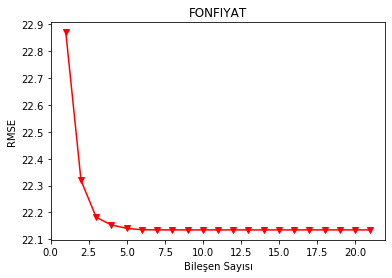

In [12]:
#CV
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)


#Hata hesaplamak için döngü
RMSE = []

for i in np.arange(1, X_train_p.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train_p, y_train_p, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Sonuçların Görselleştirilmesi
plt.plot(np.arange(1, X_train_p.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('FONFIYAT');

In [21]:
pls_model = PLSRegression(n_components = 21).fit(X_train_p, y_train_p)

In [22]:
y_pred_p = pls_model.predict(X_test_p)

In [23]:
np.sqrt(mean_squared_error(y_test_p, y_pred_p))

22.29298685295437

## Ridge Regresyon ile Model Gelistirme
### 1. Model

In [45]:
df_rge = df.copy()
X = df_rge.drop(['TARIH','FONTIP','FONTUR','FON','FONFIYAT'], axis = 1)
y = df_rge["FONFIYAT"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X.head()

,FONTOPLAMDEGER,TEDAVPAYSAYISI,KISISAYISI,FAIZ,DOLARFIYAT,ALTINFIYAT,BB,DT,DB,DÖT,...,TR,TPP,T,VM,VDM,YBA,YHS,YMK,D,R
0,8.722176e+07,4.350000e+06,0,0.2302,5.2905,219270.871675,100.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.238294e+07,7.000000e+05,0,0.2302,5.2905,219270.871675,100.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.491130e+07,4.800000e+05,0,0.2302,5.2905,219270.871675,99.83,0.17,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.465104e+09,6.335717e+10,325392,0.2302,5.2905,219270.871675,1.01,3.44,85.25,3.07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.784293e+09,7.415738e+10,325460,0.2302,5.2905,219270.871675,0.25,99.75,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
from sklearn.linear_model import Ridge

In [47]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)

In [48]:
ridge_model

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [49]:
ridge_model.coef_

array([ 1.99548506e-08, -4.36501444e-10, -1.01864979e-05,  5.33789312e+00,
       -6.33703278e-01,  2.45254214e-06, -1.37536605e-03, -1.26321075e-02,
       -2.43176494e-02,  3.68163153e-02, -1.56943704e-02,  1.05959126e-01,
        2.52256301e-01,  1.04918931e-01, -1.40978035e-01, -3.76084541e-01,
       -8.49985257e-01, -1.04985067e+00, -4.80938207e+00,  5.91301679e-01,
       -1.93941104e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [50]:
10**np.linspace(10,-2,100)*0.5 

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

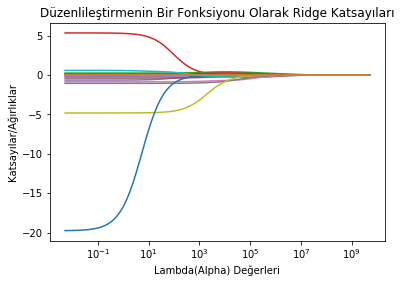

In [51]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    katsayilar.append(ridge_model.coef_) 
    

    
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale('log') 

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları');

### 2. Tahmin

In [52]:
y_pred = ridge_model.predict(X_test)

In [53]:
np.sqrt(mean_squared_error(y_test, y_pred))

22.292986467765758

### 3. Model Tuning

In [54]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

In [55]:
lambdalar[0:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [56]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdalar, 
                   scoring = "neg_mean_squared_error",
                   normalize = True)

In [57]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [58]:
ridge_cv.alpha_

0.005

In [59]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_, 
                   normalize = True).fit(X_train,y_train)

In [60]:
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

22.29408519041927

# Dogrusal olmayan Coklu Regresyon

## SVR ile Model Gelistirme
### 1. Model

In [4]:
df_svr = df.copy()
X = df_svr.drop(['TARIH','FONTIP','FONTUR','FON','FONFIYAT'], axis = 1)
y = df_svr["FONFIYAT"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X.head()

,FONTOPLAMDEGER,TEDAVPAYSAYISI,KISISAYISI,FAIZ,DOLARFIYAT,ALTINFIYAT,BB,DT,DB,DÖT,...,TR,TPP,T,VM,VDM,YBA,YHS,YMK,D,R
0,8.722176e+07,4.350000e+06,0,0.2302,5.2905,219270.871675,100.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.238294e+07,7.000000e+05,0,0.2302,5.2905,219270.871675,100.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.491130e+07,4.800000e+05,0,0.2302,5.2905,219270.871675,99.83,0.17,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.465104e+09,6.335717e+10,325392,0.2302,5.2905,219270.871675,1.01,3.44,85.25,3.07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.784293e+09,7.415738e+10,325460,0.2302,5.2905,219270.871675,0.25,99.75,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
from sklearn.svm import SVR

In [4]:
svr_rbf = SVR("rbf").fit(X_train, y_train)

### 2. Tahmin

In [5]:
y_pred = svr_rbf.predict(X_test)

In [6]:
np.sqrt(mean_squared_error(y_test, y_pred))

23.900012699516914

### 3. Model Tuning

In [7]:
svr_rbf

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_rbf,svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)

In [5]:
pd.Series(svr_cv_model.best_params_)[0]

NameError: name 'svr_cv_model' is not defined

In [ ]:
svr_tuned = SVR("rbf", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, 
                                                                        y_train)



In [ ]:
y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

## YSA ile Model Gelistirme

### 1. Model

In [2]:
df_ysa = df.copy()
X = df_ysa.drop(['TARIH','FONTIP','FONTUR','FON','FONFIYAT'], axis = 1)
y = df_ysa["FONFIYAT"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X.head()

,FONTOPLAMDEGER,TEDAVPAYSAYISI,KISISAYISI,FAIZ,DOLARFIYAT,ALTINFIYAT,BB,DT,DB,DÖT,...,TR,TPP,T,VM,VDM,YBA,YHS,YMK,D,R
0,8.722176e+07,4.350000e+06,0,0.2302,5.2905,219270.871675,100.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.238294e+07,7.000000e+05,0,0.2302,5.2905,219270.871675,100.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.491130e+07,4.800000e+05,0,0.2302,5.2905,219270.871675,99.83,0.17,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.465104e+09,6.335717e+10,325392,0.2302,5.2905,219270.871675,1.01,3.44,85.25,3.07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.784293e+09,7.415738e+10,325460,0.2302,5.2905,219270.871675,0.25,99.75,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [4]:
X_train_scaled = scaler.transform(X_train)

In [5]:
X_test_scaled = scaler.transform(X_test)

In [6]:
from sklearn.neural_network import MLPRegressor

In [7]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)

In [8]:
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 20), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [9]:
mlp_model.n_layers_

4

In [10]:
mlp_model.hidden_layer_sizes

(100, 20)

### 2. Tahmin

In [11]:
y_pred = mlp_model.predict(X_test_scaled)

In [12]:
np.sqrt(mean_squared_error(y_test, y_pred))

6.535549700357572

### 3. Model Tuning

In [13]:
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 20), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [14]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             'activation': ['relu','logistic']}

In [15]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)

In [ ]:
mlp_cv_model

In [ ]:
mlp_cv_model.fit(X_train_scaled, y_train)

In [ ]:
mlp_cv_model.best_params_

In [ ]:
mlp_tuned = MLPRegressor(alpha = 0.02, hidden_layer_sizes = (100,50,150))

In [ ]:
mlp_tuned.fit(X_train_scaled, y_train)

In [ ]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))